In [428]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [429]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [430]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from flask import Flask
from sqlalchemy.sql import func
 
app = Flask(__name__)

In [431]:
# Create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [432]:
# Declare a Base

Base = automap_base()

In [433]:
# Reflect an existing database into a new model

existing_tables = Base.prepare(engine, reflect=True)

In [434]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [435]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [436]:
measurement_view = inspector.get_columns('measurement')
for columns in measurement_view:
    print(columns['name'], columns['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [437]:
station_view = inspector.get_columns('station')
for columns in station_view:
    print(columns['name'], ['type'])

id ['type']
station ['type']
name ['type']
latitude ['type']
longitude ['type']
elevation ['type']


In [438]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [439]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [440]:
# Print the first row to review the column titles for each item

row_s = session.query(station).first()
print(row_s.__dict__)

row_m = session.query(measurement).first()
print(row_m.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fb2e63fd390>, 'longitude': -157.8168, 'name': 'WAIKIKI 717.2, HI US', 'station': 'USC00519397', 'elevation': 3.0, 'latitude': 21.2716, 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fb2e63fd908>, 'id': 1, 'tobs': 65.0, 'date': '2010-01-01', 'prcp': 0.08, 'station': 'USC00519397'}


In [441]:
# Find the most recent date in the data set.

most_recent = engine.execute("SELECT max(date) FROM measurement").fetchall()
for record in most_recent:
    print(record)

('2017-08-23',)


In [442]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_one_year)

2016-08-23


In [443]:
# Perform a query to retrieve the date and precipitation scores

rain_scores = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= '2016-08-23')

In [444]:
# Save the query results as a Pandas DataFrame and set the index to the date column

rain_scores_df = pd.DataFrame(rain_scores)
print(rain_scores_df.head())

   prcp        date
0  0.00  2016-08-23
1  0.08  2016-08-24
2  0.08  2016-08-25
3  0.00  2016-08-26
4  0.00  2016-08-27


In [445]:
# Sort the dataframe by date

print(rain_scores_df.sort_values(by="date", ascending=False))

      prcp        date
2229  0.45  2017-08-23
1528  0.08  2017-08-23
1008  0.00  2017-08-23
360   0.00  2017-08-23
1527  0.00  2017-08-22
...    ...         ...
361   0.15  2016-08-23
1881  0.70  2016-08-23
1192  0.02  2016-08-23
1009   NaN  2016-08-23
0     0.00  2016-08-23

[2230 rows x 2 columns]


In [446]:
#Remove Nan fields

new_rain_scores_df = rain_scores_df.fillna(0)
print(new_rain_scores_df)

      prcp        date
0     0.00  2016-08-23
1     0.08  2016-08-24
2     0.08  2016-08-25
3     0.00  2016-08-26
4     0.00  2016-08-27
...    ...         ...
2225  0.09  2017-08-19
2226  0.00  2017-08-20
2227  0.56  2017-08-21
2228  0.50  2017-08-22
2229  0.45  2017-08-23

[2230 rows x 2 columns]


In [447]:
# Sorting New Dataframe 

final_rain_scores_dataframe = new_rain_scores_df.sort_values(by="date", ascending=False)
print(final_rain_scores_dataframe)

      prcp        date
2229  0.45  2017-08-23
1528  0.08  2017-08-23
1008  0.00  2017-08-23
360   0.00  2017-08-23
1527  0.00  2017-08-22
...    ...         ...
361   0.15  2016-08-23
1881  0.70  2016-08-23
1192  0.02  2016-08-23
1009  0.00  2016-08-23
0     0.00  2016-08-23

[2230 rows x 2 columns]


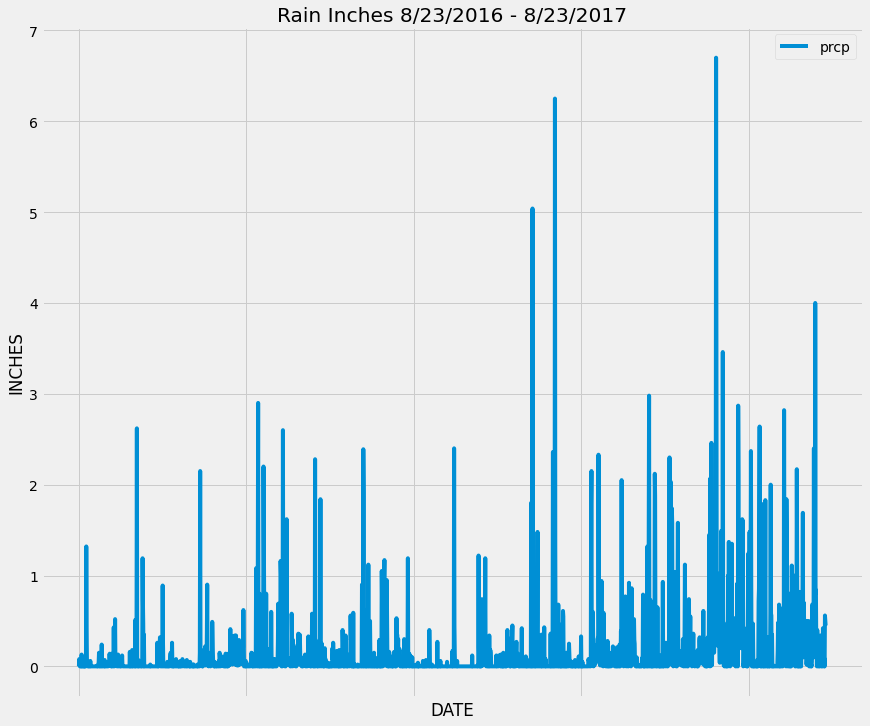

In [448]:
ax = new_rain_scores_df.plot(figsize = (12,10), legend=True)
plt.tight_layout()
plt.xlabel("DATE")
plt.ylabel("INCHES")
plt.title("Rain Inches 8/23/2016 - 8/23/2017")
plt.setp(ax.get_xticklabels(), visible=False)
plt.show()

In [449]:
# Use Pandas to calcualte the summary statistics for the precipitation data

print(final_rain_scores_dataframe.describe())

              prcp
count  2230.000000
mean      0.160664
std       0.442067
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       6.700000


# Exploratory Station Analysis

In [450]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(station.name).count()
print(total_stations)

9


In [451]:
for row in session.query(station.station, station.id).all():
    print(row)

('USC00519397', 1)
('USC00513117', 2)
('USC00514830', 3)
('USC00517948', 4)
('USC00518838', 5)
('USC00519523', 6)
('USC00519281', 7)
('USC00511918', 8)
('USC00516128', 9)


In [452]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

activity_counts = session.query(measurement.station, func.count(measurement.station)).\
                  group_by(measurement.station).\
                  order_by(func.count(measurement.station).desc()).all()

print(activity_counts)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [453]:
USC00519397 = session.query(measurement).filter_by(station='USC00519397').count()
print(USC00519397)


2724


In [454]:
USC00513117 = session.query(measurement).filter_by(station='USC00513117').count()
print(USC00513117)

2709


In [455]:
USC00514830 = session.query(measurement).filter_by(station='USC00514830').count()
print(USC00514830)

2202


In [456]:
USC00517948 = session.query(measurement).filter_by(station='USC00517948').count()
print(USC00517948)

1372


In [457]:
USC00518838 = session.query(measurement).filter_by(station='USC00518838').count()
print(USC00518838)

511


In [458]:
USC00519523 = session.query(measurement).filter_by(station='USC00519523').count()
print(USC00519523)

2669


In [459]:
USC00519281 = session.query(measurement).filter_by(station='USC00519281').count()
print(USC00519281)

2772


In [460]:
USC00511918 = session.query(measurement).filter_by(station='USC00511918').count()
print(USC00511918)

1979


In [461]:
USC00516128 = session.query(measurement).filter_by(station='USC00516128').count()
print(USC00516128)

2612


In [462]:
# List the stations and the counts in descending order.

active_station_df = pd.DataFrame({"Station": ['USC00519397','USC00513117','USC00514830','USC00517948','USC00518838','USC00519523','USC00519281','USC00511918','USC00516128'],"ID":[1,2,3,4,5,6,7,8,9], "Amount": [2724,2709,2202,1372,511,2669,2772,1979,2612]})
new_active_station_df = active_station_df.sort_values(by="Amount", ascending=False)

print(new_active_station_df)

print("Station 7, USC00519281, is the most active station")
 

       Station  ID  Amount
6  USC00519281   7    2772
0  USC00519397   1    2724
1  USC00513117   2    2709
5  USC00519523   6    2669
8  USC00516128   9    2612
2  USC00514830   3    2202
7  USC00511918   8    1979
3  USC00517948   4    1372
4  USC00518838   5     511
Station 7, USC00519281, is the most active station


In [463]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                         filter(measurement.station == activity_counts[0][0]).all()      

print(temp)

                         

[(54.0, 85.0, 71.66378066378067)]


In [464]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station = session.query(measurement.station, measurement.tobs).\
      filter(measurement.station == 'USC00519281').\
      filter(measurement.date >= '2016-08-23').all()

In [465]:
# Dataframe of Active Station 

active_station_df = pd.DataFrame(active_station, columns=['Station', 'Temperature'])
print(active_station_df.head())

       Station  Temperature
0  USC00519281         77.0
1  USC00519281         77.0
2  USC00519281         80.0
3  USC00519281         80.0
4  USC00519281         75.0


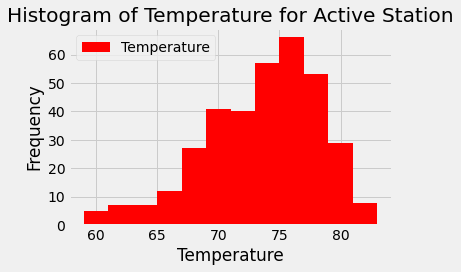

In [466]:
graph = active_station_df.plot.hist(bins=12, color="red")
graph.set_title("Histogram of Temperature for Active Station")
graph.set_xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [467]:
# Close Session
session.close()